In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/train.csv')

# Encode target
df = df.copy()
df['Personality'] = LabelEncoder().fit_transform(df['Personality'])

# Temporary imputation
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                'Friends_circle_size', 'Post_frequency']
cat_cols = ['Stage_fear', 'Drained_after_socializing']

# Fill numeric with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Binary encoding
for col in cat_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

# Train/test split (optional, not used here)
X = df[numeric_cols + cat_cols]
y = df['Personality']

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


,feature,importance,missing_rate
6,Drained_after_socializing,0.253570,0.062028
5,Stage_fear,0.195558,0.102192
0,Time_spent_Alone,0.180452,0.064241
4,Post_frequency,0.127375,0.068236
2,Going_outside,0.119284,0.079141
1,Social_event_attendance,0.078001,0.063701
3,Friends_circle_size,0.045761,0.056899


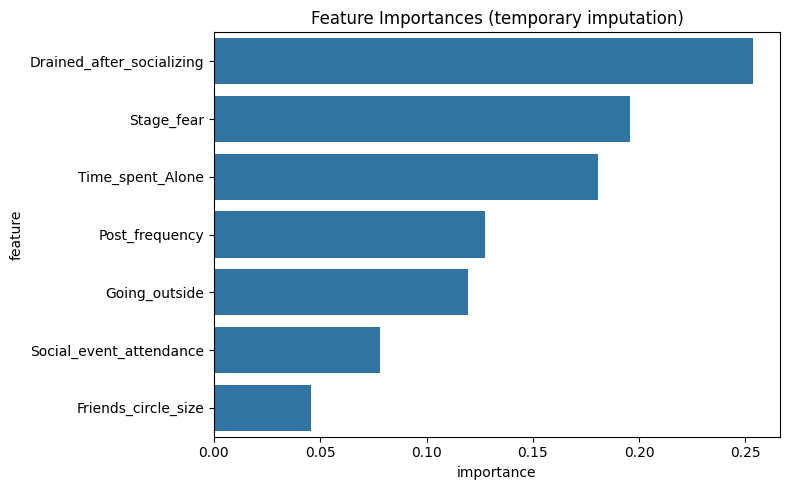

In [6]:
df_raw = pd.read_csv('../data/train.csv')

#Feature importances
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances,
    'missing_rate': df_raw[X.columns].isnull().mean().values  # Calculate true missing rate
}).sort_values(by='importance', ascending=False)

display(feat_imp)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Feature Importances (temporary imputation)')
plt.tight_layout()
plt.show()